# Big Data Mining, 52002/52019 - 2023-24 - Final Assignment - Part 2 : Networks [42 pts]
### **Instructions:**
* **Fill your ID Here:** 341348910
* Work on the assignment and submit your solution **individually**. <br>
No sharing of information on the assignment is allowed between student.


* **Format:** Fill code, text explanations and output (figures, tables ..) in the designated places. <br>For most questions, the code you fill should run in this .ipynb notebook and generate the output automatically after running (e.g. in `google colab`). <br>For others, you will need to run commands in other environments (e.g. unix) - in this case, just copy the commands and the relevant outputs in the designated text blocks.
* Submit your filled solution by July 31st 23:59 your solution on moodle.

* **Grading:** There are six questions in this part. Each question in this part is worth 7 points for your final grade (total: 80 points)

* **Note:** Points from your grade may be deducted for submitting wrong/missing parts of files OR if not submitting the complete generated/complied output. Make sure to run the .ipynb notebook and save it before submitting.
* **Note:** Some parts of the code might take up to several hours to run.Be patient. However don't leave everything to run at the last minute but prepare in advance so that your entire solution runs and finishes on time.

FOR SUBMISSION:
PLEASE SUBMIT THE FOLLOWING:
1. Your fully executed IPYNB file (with the expected output)
2. A PDF/HTML import of your executed IPYNB file (with the expected output)

SUBMISSIONS WITHOUT OUTPUTS WILL NOT BE GRADED!!

* **Good luck!**


**Q1.** Extract the English wikipedia network file for 2002 from the wikipedia

---

networks dataset available in [here](https://zenodo.org/record/2539424) and load it into python.  <br>
This **directed** network describe *links* between wikipedia pages, where each node corresponds to a page, and each edge corresponds to a link from the first to the second page. Each network describes connections between pages of different languages and years (...). <br>

Compute the in-degree and out-degree of every node (in the **directed** network), and list the IDs of the five nodes (webpages) with the highest out-degree along with their degrees. Repeat for the nodes with the highest in-degree.  <br>
Next, compute the `degree distribution` of the graph, i.e. the relative frequency $f_k$ (out of $n$ nodes) of nodes having in or out-degree $k$ for every $k$ from $0$ to the maximal degree.

Plot the degree distributions, i.e. degree $f_k$ as a function of $k$ for the in and out-degrees separately. You may use a log transformation to improve readability of the plot.

**Q2.**
Next, convert the network to an **undirected** network, by including the edge $(i,j)$ whenever either the edge $(i,j)$ or the edge $(j,i)$ (or both) belong to the network.

Simulate a random graph using the `Erdos-Renyi` model with the same number of nodes $n$ as the real **undirected** network, and with edge probability $p$ chosen such that the `expected` number of overall edges in the simulated random graph is equal to the actual number of edges in the real network.
Compute and plot the degree distributions for the true *undirected* network
and of the random graph you have generated on the same figure.
<br>
Is the `Erdos-Renyi` model a good generative model for the true graph, based on the degree distribution? # does it seem to give a power-law degree distribution?


**Q3.** Run the PageRank algorithm with $\beta=0.85$ on the (directed) network until convergance with tolerance $\epsilon < 0.000001$.
Report the ten pages with the highest PageRank values.
Make a scatter plot of the PageRank score vs. the in-degress of the pages.
Next, make a similar scatter plot the PageRank score vs. the out-degrees.
Explain the two plots.

**Remark** Plotting large datasets may be challenging computationally and/or visually. In these cases (here and possibly in other questions), you may plot only a subset of the data (e.g. by random sampling, or choosing a subset based on some criteria). If you do so, explain clearly your choices when visualizing the data.

**Q4.** Run the `Topic-Specific PageRank` algorithm with the topic (i.e. teleport set) being all pages containing `Sports` in their name. Display the resulting top 10 pages.

Next, make another cateogry of your choice based on the strings describing the word names, and set all the pages in this category as your teleport set. Repeat the Topic-Specific PageRank computation for this set and report the top $10$ pages.


**Q5.**
Run the `Louvain` algorithm available in `networkx` for finding the community structure for the **undirected** graph, implemented in the `community` python module. Report the number of communities found.  <br>
Compute and report the resulting `Modularity` you got for the network division to communities.

Next, unite all the small communities with fewer than $100$ nodes into one 'super community'. Then, display the network together with the community information (in colors) using `networkx`.

**Q6.** Choose the $5$ largest communities from the previous question and extract the node names for them.
For each community, extract the actual html page for the pages corresponding to the nodes of this community.
Display the most frequent words in the html pages of each community (you can use a bar plot, a word cloud or other methods of your choice showing what words are frequent) and use the words statistics to give an interpretation to each community.
You should include only English words - remove 'words' containing numbers, special characters etc. Remove also all common short words (e.g. 'the', 'and', 'a' ...) known as 'stop-words'. This can be done using the 'nltk' python module.




SOLUTIONS:

In [1]:
# General code
import csv
from operator import itemgetter
import networkx as nx  # networkx - python library for dealing with graphs
from networkx.algorithms import community # This part of networkx, for community detection, needs to be imported separately.
import pandas as pd # Imported library - Deal with dataframes
import matplotlib.pyplot as plt # Imported library - Display plots


from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


[37310.0, 3434750.0, 33094374.0, 41882.0, 11867.0]
[37310.0, 23056.0, 13316, 18902.0, 30890.0]


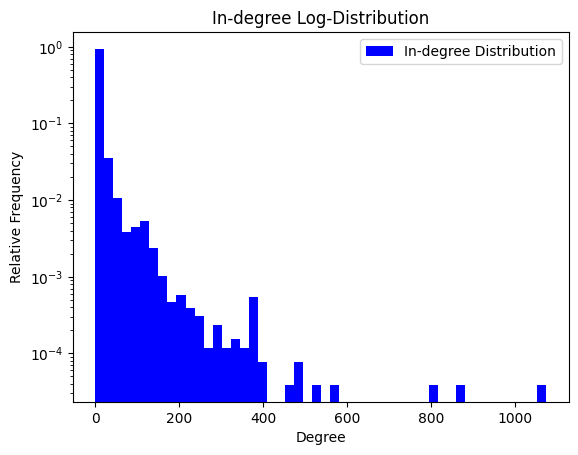

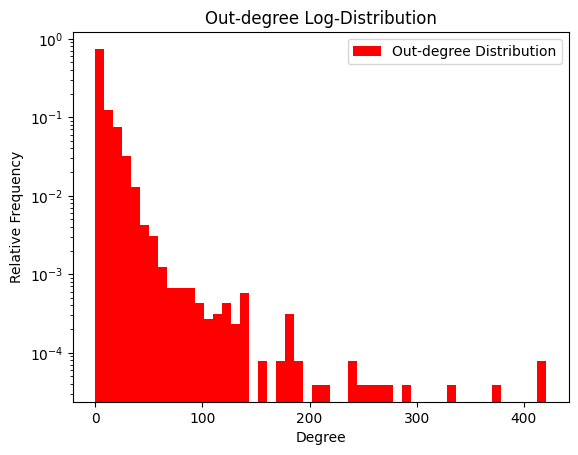

In [2]:
# Q1. Code for reading the wikipedia networks here:
import os
import numpy as np # Imported library - Deal with arrays

file_path = '/content/drive/MyDrive/Colab Notebooks/enwiki.wikilink_graph.2002-03-01.csv'
df = pd.read_csv(file_path,delimiter='\t')
G = nx.from_pandas_edgelist(df, source='page_id_from', target='page_id_to',create_using=nx.DiGraph()) # Directed graph
page_title_mapping = dict(zip(df['page_id_from'], df['page_title_from']))
nx.set_node_attributes(G, page_title_mapping, name='page_title')

in_deg = dict(G.in_degree())  # In-degree
out_deg = dict(G.out_degree())  # Out-degree
in_deg_sorted = dict(sorted(in_deg.items(), key = lambda item: item[1], reverse=True))  # Sorted in-degree by descending order
out_deg_sorted = dict(sorted(out_deg.items(), key = lambda item: item[1],reverse=True))  # Sorted out-degree by descending order
top_5_in_deg = list(in_deg_sorted.keys())[:5]  # Top 5 in degrees
top_5_out_deg = list(out_deg_sorted.keys())[:5]  # Top 5 out degrees

print(top_5_in_deg)
print(top_5_out_deg)

n = G.number_of_nodes()

degrees_in_distr = [d for n,d in G.in_degree()]
plt.hist(degrees_in_distr,color='b',bins = 50,label='In-degree Distribution',weights=np.ones_like(degrees_in_distr)/len(degrees_in_distr),log=True)
plt.xlabel('Degree')
plt.ylabel('Relative Frequency')
plt.title('In-degree Log-Distribution')
plt.legend()
plt.show()

degrees_out_distr = [d for n,d in G.out_degree()]
plt.hist(degrees_out_distr,color='r',bins = 50,label='Out-degree Distribution',weights=np.ones_like(degrees_out_distr)/len(degrees_out_distr),log=True)
plt.xlabel('Degree')
plt.ylabel('Relative Frequency')
plt.title('Out-degree Log-Distribution')
plt.legend()
plt.show()


The graphs were scaled in 'log' for convenience.\
The webpages with the highest in-degrees are [37310, 3434750, 33094374, 41882, 11867], while the webpages with the highest out-degrees are [37310, 23056, 13316, 18902, 30890].

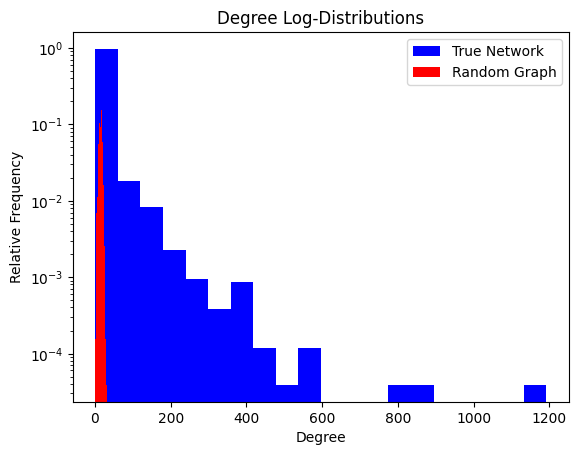

In [3]:
# Q2. Code
import math # Imported library - For Calculations

U = G.to_undirected()
n_undirected = U.number_of_nodes()  # Number of nodes
M = U.number_of_edges()  # Number of expected edges
p = M/math.comb(n_undirected,2)  # edge probability
random_graph = nx.erdos_renyi_graph(n_undirected, p, seed=2)  # Generate random graph according to Erdos-Renyi model

degree_distr_true = [d for n, d in U.degree()]
degree_distr_random = [d for n, d in random_graph.degree()]

plt.hist(degree_distr_true,color='b',bins=20,label='True Network',weights=np.ones_like(degree_distr_true)/len(degree_distr_true), log=True)
plt.hist(degree_distr_random,color='r',bins=20,label='Random Graph',weights=np.ones_like(degree_distr_random)/len(degree_distr_random),log=True)
plt.xlabel('Degree')
plt.ylabel('Relative Frequency')
plt.title('Degree Log-Distributions')
plt.legend()
plt.show()


Text for Q2: The graph was scaled in 'log' for convenience.\
In the graph, we observe significant differences between the two distributions. The degree distribution of the Erdos-Renyi random graph have much lower intensity , specially in the higher degrees, compared to the true network. Additionally, the heavy tail present in the true network's distribution almost disappears when compared to the random graph. Therefore, it doesn't seem to exhibit a power-law distribution. The Erdos-Renyi model is not suitable generative model for the true graph based on the degree distribution.

<ipython-input-77-54cd14df14fc>:52: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  self.dangling_pages = np.where(np.array(self.number_out_links) == 0)[0].tolist() # True
<ipython-input-77-54cd14df14fc>:63: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  g.dangling_pages = np.where(np.array(g.number_out_links) == 0)[0].tolist()


Top ten pages with highest PageRank values:
Page ID: 38579.0, PageRank: 0.00636906948202354
Page ID: 5363.0, PageRank: 0.004957251407133183
Page ID: 18110.0, PageRank: 0.004379326154214122
Page ID: 3434750.0, PageRank: 0.0037553790634432416
Page ID: 28419612.0, PageRank: 0.0028704758328835845
Page ID: 33094374.0, PageRank: 0.002648929086406033
Page ID: 34558.0, PageRank: 0.0024517646043044736
Page ID: 4501, PageRank: 0.002338918387783542
Page ID: 11867.0, PageRank: 0.00222781549785223
Page ID: 9316.0, PageRank: 0.002135286409415424


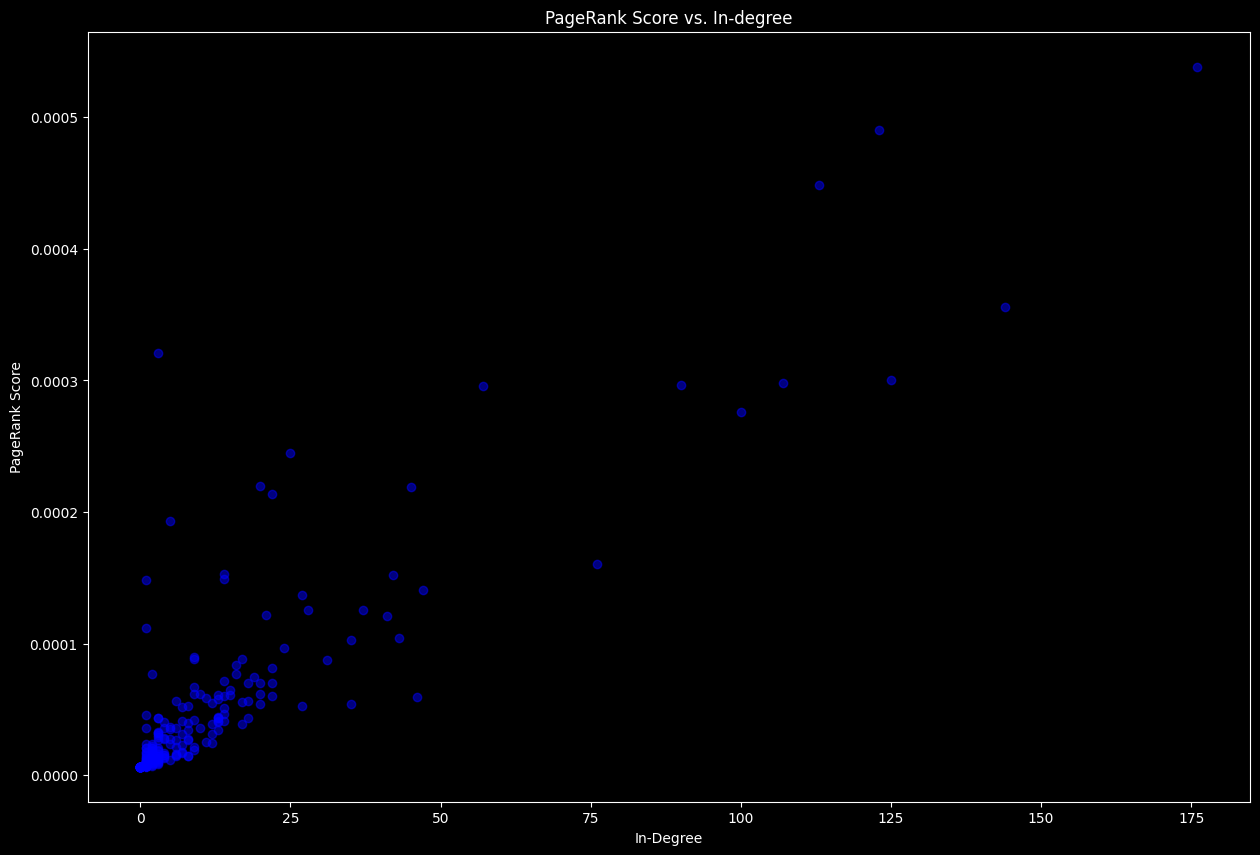

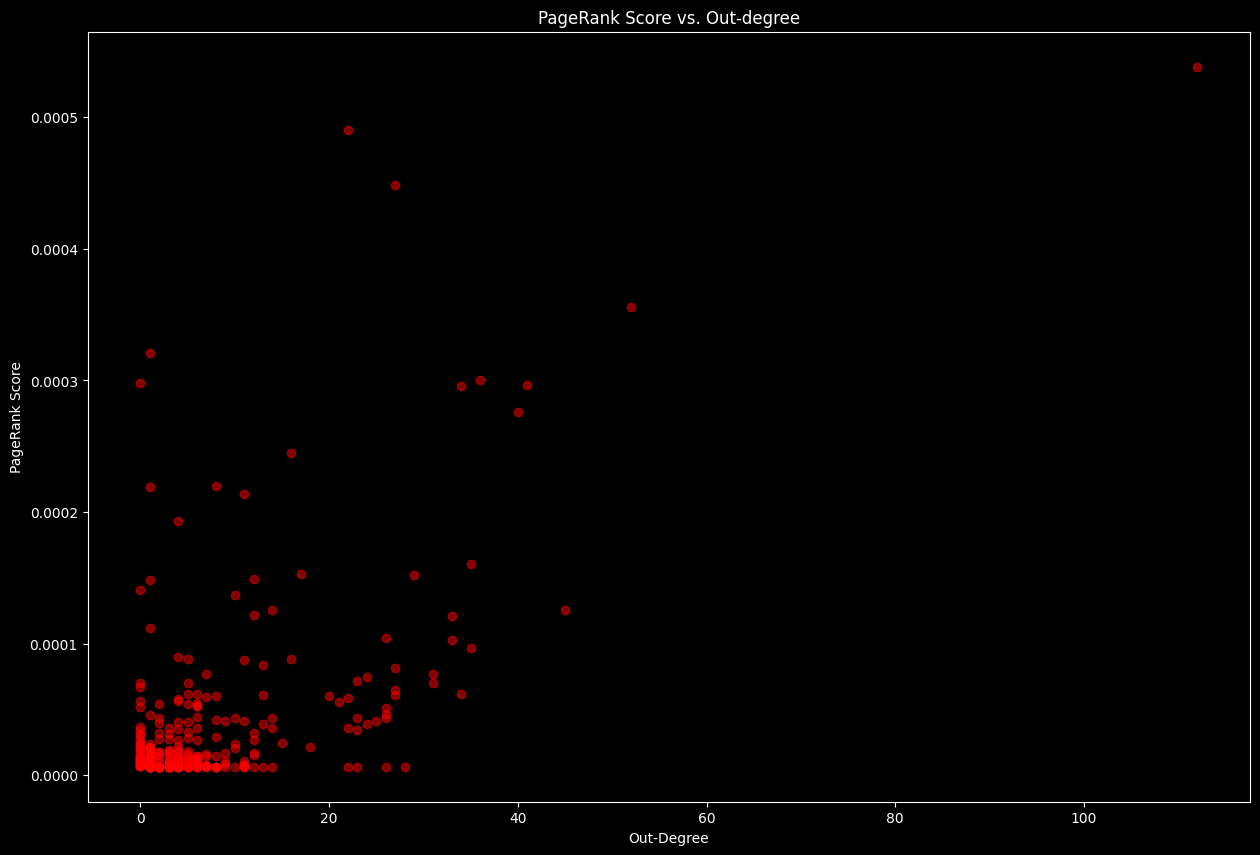

In [ ]:
# Q3. Code
import random # Imported library - To select random nodes
random.seed(42)

original_node_names = list(G.nodes()).copy()
node_mapping = {i: j for j, i in enumerate(original_node_names)}
G_int = nx.relabel_nodes(G, node_mapping) # change node names to integers from 0 to n-1

def p_step(g, p,u, beta=0.85):
  '''Performs a single step in the PageRank computation,
  with web g and parameter s.  Applies the corresponding M
  matrix to the vector p, and returns the resulting
  vector.'''
  n = g.size
  v = np.matrix(np.zeros((n,1)))
  inner_product = sum([p[j] for j in g.dangling_pages]) # .keys()
  for j in range(n):
    v[j] = beta*sum([p[k]/g.number_out_links[k] for k in g.in_links[j]])+beta*inner_product/n
  for j in u: # modify for personalized pages
    v[j] += (1-beta)/u.size
  return v/np.sum(v)

def p_pagerank(g,u, beta=0.85, tolerance=0.000001):
  '''Returns the PageRank vector for the web g and
  parameter s, where the criterion for convergence is that
  we stop when M^(j+1)P-M^jP has length less than
  tolerance, in l1 norm.'''
  n = g.size
  p = np.matrix(np.ones((n,1)))/n
  iteration = 1
  change = 2
  while change > tolerance:
    new_p = p_step(g, p,u, beta)
    change = np.sum(np.abs(p-new_p))
    #print("Iteration:" , iteration, " Change in l1 norm: ", change)
    p = new_p
    iteration += 1
  return np.array(p).reshape(n) # return one dimensional array

# A class representing the web network
class web:
  def __init__(self, n):
    self.size = n
    self.in_links = {}
    self.number_in_links = {}
    self.number_out_links = {}
    self.dangling_pages = []
    for j in range(n):
      self.in_links[j] = []
      self.number_in_links[j] = 0
      self.number_out_links[j] = 0
    self.dangling_pages = np.where(np.array(self.number_out_links) == 0)[0].tolist() # True

def web_from_networkx(g_nx):  # Convert format from networkx library to array of in_links
  n = g_nx.number_of_nodes()
  g = web(n)
  for e in g_nx.edges:
    g.in_links[e[1]].append(e[0])
    g.number_in_links[e[1]] += 1
    g.number_out_links[e[0]] += 1 # update numbers
  for i in range(n):
    g.number_in_links[i] = len(g.in_links[i])
  g.dangling_pages = np.where(np.array(g.number_out_links) == 0)[0].tolist()
  return g

# Compute page-rank
W = web_from_networkx(G_int)
u = np.array(range(n)) # set all nodes
pr = p_pagerank(W,u, 0.85, 0.000001)
top10_pages = pr.argsort()[-10:][::-1] # Pages with the top page-rank values

mapping_dict = {value: key for key, value in node_mapping.items()} # from integer labels to original node names
print("Top ten pages with highest PageRank values:")
for page in top10_pages:
    print(f"Page ID: {mapping_dict[page]}, PageRank: {pr[page]}")

in_degrees = np.array([G_int.in_degree(node) for node in G_int.nodes()])
out_degrees = np.array([G_int.out_degree(node) for node in G_int.nodes()])

df_page_rank = pd.DataFrame(data={"In-Degree":in_degrees,"Out-Degree":out_degrees,"PageRank":pr})
df_pr_selected = df_page_rank.sample(n=300, random_state=42)  # Randomly sample rows


plt.scatter(df_pr_selected['In-Degree'], df_pr_selected['PageRank'], c='blue', alpha=0.5)
plt.title("PageRank Score vs. In-degree")
plt.xlabel("In-Degree")
plt.ylabel("PageRank Score")
plt.show()

plt.scatter(df_pr_selected['Out-Degree'], df_pr_selected['PageRank'], c='red', alpha=0.5)
plt.title("PageRank Score vs. Out-degree")
plt.xlabel("Out-Degree")
plt.ylabel("PageRank Score")
plt.show()


Text for Q3.:

Top ten pages with highest PageRank values:\
Page ID: 38579.0, PageRank: 0.00636906948202354\
Page ID: 5363.0, PageRank: 0.004957251407133183\
Page ID: 18110.0, PageRank: 0.004379326154214122\
Page ID: 3434750.0, PageRank: 0.0037553790634432416\
Page ID: 28419612.0, PageRank: 0.0028704758328835845\
Page ID: 33094374.0, PageRank: 0.002648929086406033\
Page ID: 34558.0, PageRank: 0.0024517646043044736\
Page ID: 4501, PageRank: 0.002338918387783542\
Page ID: 11867.0, PageRank: 0.00222781549785223\
Page ID: 9316.0, PageRank: 0.002135286409415424\

The two scatter plots of PageRank score versus in-degree and out-degree provide insights into the relationship between the importance of a webpage (measured by its PageRank score) and its connectivity within the network.\
Due to the large sample size, I have reduced the number of observations to 300 to facilitate the clear observation of any existing correlation, which might otherwise be hard to identify in cases of very large sample sizes. The observations were chosen randomly to ensure independence.\
We observe a clear positive correlation between PageRank score and in-degree with a very steep slope. Pages with a higher in-degree tend to have higher PageRank scores (More popular pages).\
Unlike the in-degree, the correlation between out-degree and PageRank score is less defined and can be viewed in the less steep slope. Overall, pages with higher out-degree don't necessarily have higher PageRank scores.

In [ ]:
# Q4. Code
def compute_topic_page_rank(G_int, topic_keyword, W, mapping_dict):
    # Filter nodes based on topic_keyword
    filtered_nodes = np.array([node for node, data in G_int.nodes(data=True) if topic_keyword.lower() in data.get('page_title', '').lower()])
    # Compute page-rank for the filtered nodes
    u_topic = filtered_nodes  # Set topic-specific nodes
    pr_topic = p_pagerank(W, u_topic, 0.85, 0.000001)
    top10_pages_topic = pr_topic.argsort()[-10:][::-1]  # Pages with the top page-rank values

    # Print the top PageRank pages for the topic
    print(f"Top 10 pages for '{topic_keyword}':")
    for page in top10_pages_topic:
      print(f"Page ID: {mapping_dict[page]}, PageRank: {pr[page]}")

# Example usage:
topic_keyword = 'Sports'
compute_topic_page_rank(G_int, topic_keyword, W, mapping_dict)

topic_keyword = 'Science'
compute_topic_page_rank(G_int, topic_keyword, W, mapping_dict)


Top 10 pages for 'Sports':
Page ID: 28498.0, PageRank: 1.8498873476022843e-05
Page ID: 1022, PageRank: 3.224215716675262e-05
Page ID: 28242.0, PageRank: 1.1681744132574325e-05
Page ID: 38983.0, PageRank: 4.866099519545099e-05
Page ID: 32927.0, PageRank: 0.0019844006759251525
Page ID: 38981.0, PageRank: 2.0754932850898007e-05
Page ID: 31717.0, PageRank: 0.0017507938337547417
Page ID: 40671, PageRank: 6.544973090103892e-06
Page ID: 3447, PageRank: 6.544973090103892e-06
Page ID: 36847, PageRank: 6.544973090103892e-06
Top 10 pages for 'Science':
Page ID: 18110.0, PageRank: 0.004379326154214122
Page ID: 26787.0, PageRank: 0.0005817178523768324
Page ID: 38579.0, PageRank: 0.00636906948202354
Page ID: 14285.0, PageRank: 0.00023618307141081733
Page ID: 26700.0, PageRank: 0.00034963589575580335
Page ID: 5323.0, PageRank: 0.00043457140691408985
Page ID: 28925.0, PageRank: 4.982713415091374e-05
Page ID: 23047.0, PageRank: 9.114158106668565e-05
Page ID: 11296.0, PageRank: 0.000283045161397787
Page

Text for Q4.: \
Top 10 pages for 'Sports':\
Page ID: 28498.0, PageRank: 0.022445425114876683\
Page ID: 1022, PageRank: 0.02225452812356816\
Page ID: 28242.0, PageRank: 0.02191545393805999\
Page ID: 38983.0, PageRank: 0.02134198740224181\
Page ID: 32927.0, PageRank: 0.02044317818245085\
Page ID: 38981.0, PageRank: 0.019494438297845536\
Page ID: 31717.0, PageRank: 0.018819194039018234\
Page ID: 40671, PageRank: 0.0184293027269875\
Page ID: 3447, PageRank: 0.0184293027269875\
Page ID: 36847, PageRank: 0.0184293027269875\
\
Top 10 pages for 'Science':\
Page ID: 18110.0, PageRank: 0.02281645609185898\
Page ID: 26787.0, PageRank: 0.017446224017263853\
Page ID: 38579.0, PageRank: 0.012702414515046044\
Page ID: 14285.0, PageRank: 0.007338343781448798\
Page ID: 26700.0, PageRank: 0.005445686672363419\
Page ID: 5323.0, PageRank: 0.005442939717783515\
Page ID: 28925.0, PageRank: 0.005207498306172021\
Page ID: 23047.0, PageRank: 0.0051570633081991744\
Page ID: 11296.0, PageRank: 0.00490631489172396\
Page ID: 30919.0, PageRank: 0.00490631489172396

Number of communities using Louvain algorithm: 106
0.6498


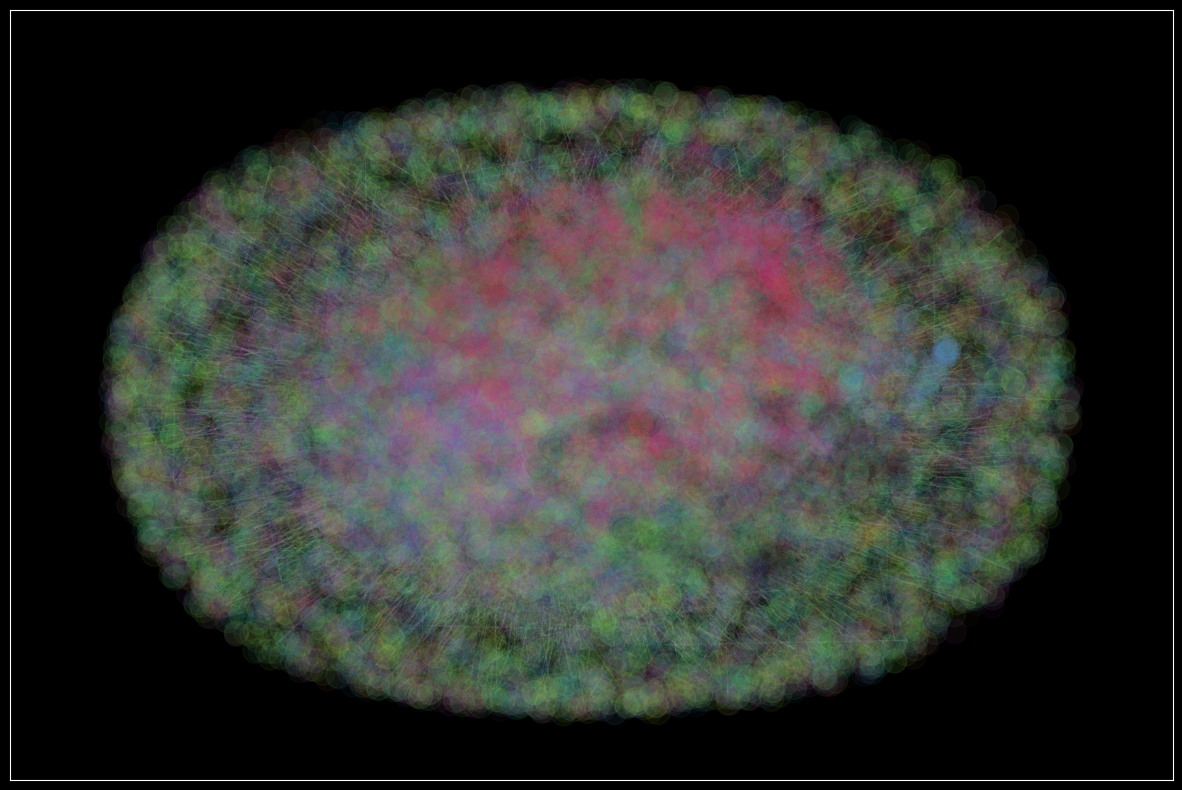

Number of communities after merging small communities: 18


In [ ]:
# Q5. Code
random.seed(42)  # Imported library - Set a fixed random seed

import community.community_louvain as cl # Imported library - Louvain algorithm
import networkx.algorithms.community as nx_comm # Imported library - Finds community structure

#U_int = nx.relabel_nodes(U, {i: j for j, i in enumerate(U.nodes())}) # change node names to integers from 0 to n-1

c2 = cl.best_partition(U)

communities2 = [set() for _ in range(len(set(c2.values())))]
for i, v in c2.items():
  communities2[v].add(i)
print("Number of communities using Louvain algorithm: " + str(len(communities2)))
# Report modularity
print(np.round(nx_comm.modularity(U, communities2), 4))

pos = nx.spring_layout(U, k=0.1)

# Functions for plotting communities according to their colors
def set_node_community(G, communities):
  for c, v_c in enumerate(communities):
    for v in v_c:
      # Add 1 to save 0 for external edges
      G.nodes[v]['community'] = c + 1

def set_edge_community(G):
  '''Find internal edges and add their community to their attributes'''
  for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
      # Internal edge, mark with community
      G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
      # External edge, mark as 0
      G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
  '''Assign a color to a vertex.'''
  r0, g0, b0 = 0, 0, 0
  n = 16
  low, high = 0.1, 0.9
  span = high - low
  r = low + span * (((i + r_off) * 3) % n) / (n - 1)
  g = low + span * (((i + g_off) * 5) % n) / (n - 1)
  b = low + span * (((i + b_off) * 7) % n) / (n - 1)
  return (r, g, b)

# A function for plotting a network partitioned into communities
def draw_communities(G, communities):
  # Plot recovered communities
  plt.rcParams.update(plt.rcParamsDefault)
  plt.rcParams.update({'figure.figsize': (15, 10)})
  plt.style.use('dark_background')

  # Set node and edge communities
  set_node_community(G, communities)
  set_edge_community(G)

  # Set community color for internal edges
  external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
  internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
  internal_color = ["black" for e in internal]
  node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
  # external edges
  nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
  # internal edges
  nx.draw_networkx(
    G, pos=pos,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05,
    with_labels=False)
  plt.show()


# Identify communities with fewer than 100 nodes
small_communities = [comm for comm in communities2 if len(comm) < 100]

# Assign all nodes from small communities to a new 'super community'
super_community = set().union(*small_communities)

# Remove nodes in small communities from the original communities list
communities_new = [comm for comm in communities2 if comm not in small_communities]

# Add the super community to the communities list
communities_new.append(super_community)

draw_communities(U, communities_new)
print("Number of communities after merging small communities: " + str(len(communities_new)))


Text for Q5.:

Number of communities using Louvain algorithm: 106\
Modularity: 0.6498

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


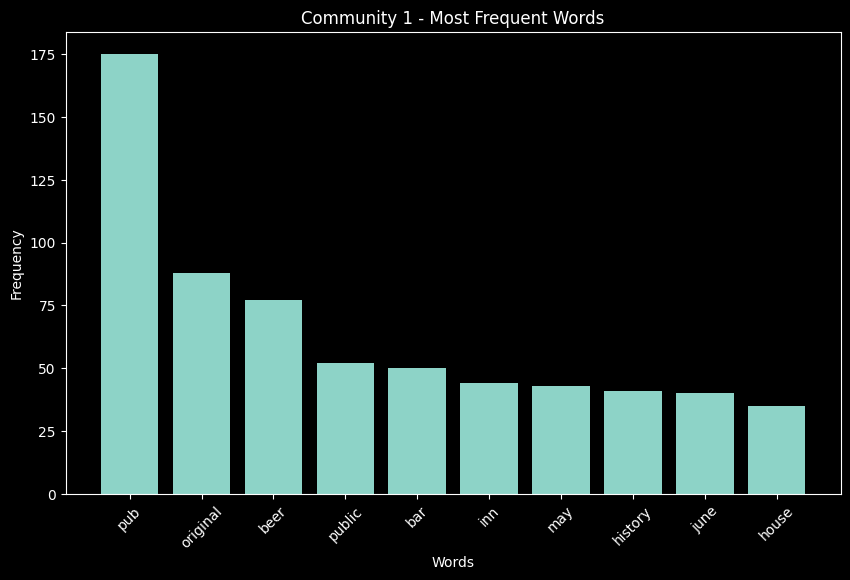

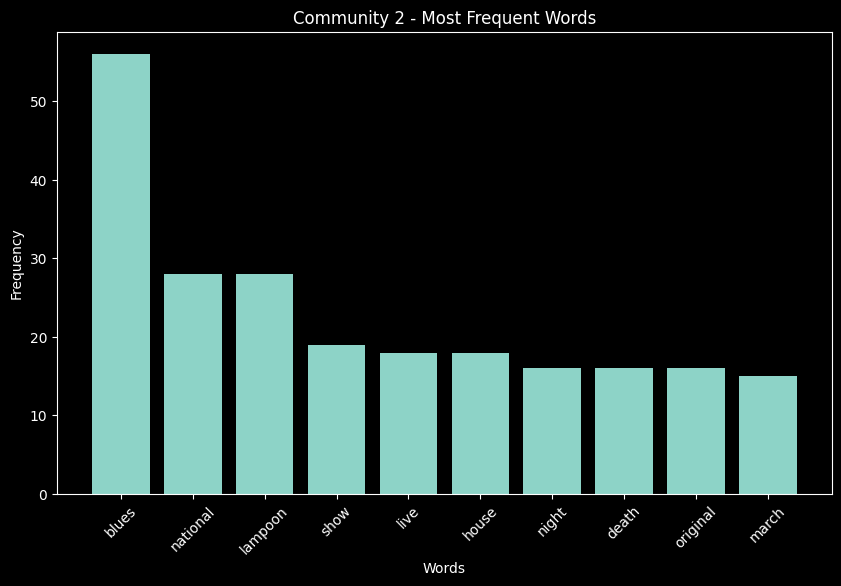

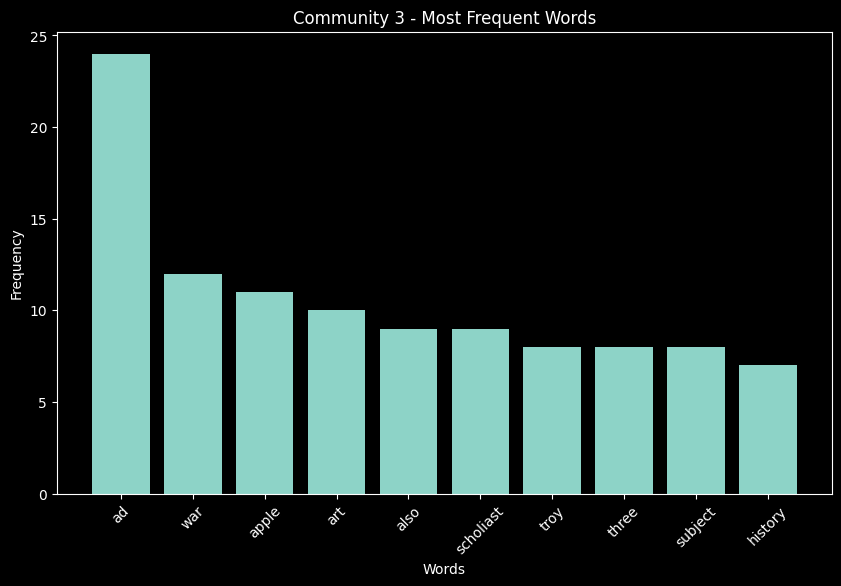

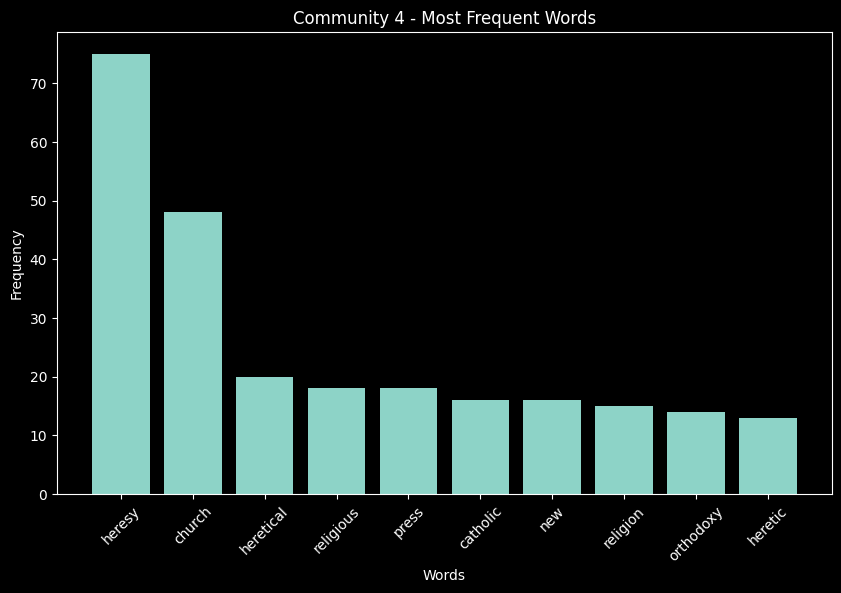

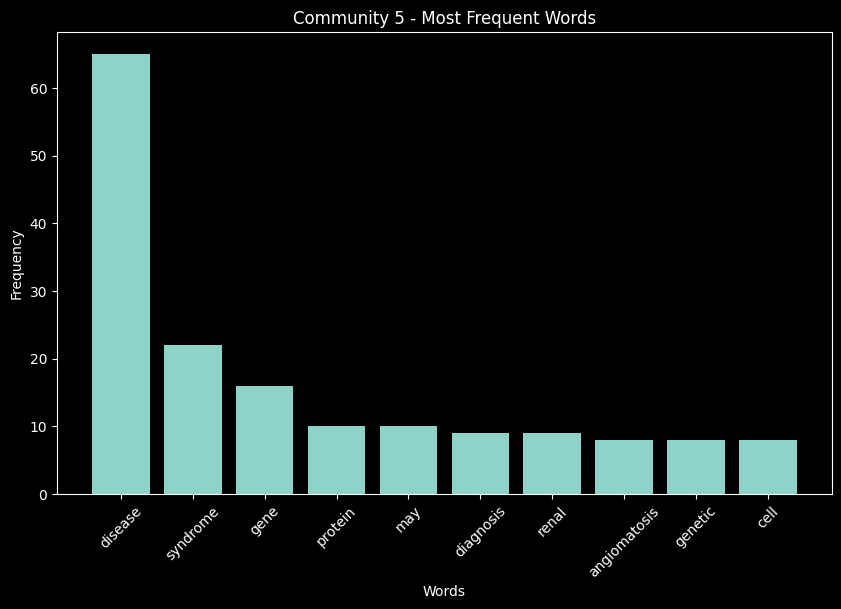

In [ ]:
# Q6. Code
import re # Imported library - Support for regular expressions
import nltk # Imported library - Helps for work with natural language data
import urllib.request # Imported library - Work with URLs, opening and reading web pages
from nltk.corpus import stopwords # Imported library - List of stopwords
from nltk.tokenize import word_tokenize # Imported library - tokenizes a given text into individual words or tokens
from collections import Counter # Imported library - Counts words
from bs4 import BeautifulSoup # Imported library - Excludes html tags

nltk.download('stopwords')
english_stopwords = stopwords.words('english')
nltk.download('words')
english_words = set(nltk.corpus.words.words())
nltk.download('punkt')


sorted_sets = sorted(communities2, key=len, reverse=True)
top5_comm_max_length = sorted_sets[:5]  # Top 5 communities based on max len

def clean_text(txt):  # Clean the text
  soup = BeautifulSoup(txt, "html.parser")  # Remove HTML tags
  text_without_html = soup.get_text()
  tokens = word_tokenize(text_without_html.lower())
  tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]  # Exclude stop words
  english_tokens = [t for t in tokens_wo_stopwords if t in english_words]  # Filter out non-English words
  final_tokens = [t for t in english_tokens if t not in ['edit'] ]  # Manually adding the word 'edit' as is part of wikipedia's navigation elements
  final_text = " ".join(final_tokens)
  return final_text

def fetch_wikipedia_page(pages_id):  # Reads pages within a community and adds them to one string
  txt = ""
  for page in pages_id:
    url = f"http://en.wikipedia.org/?curid={page}"
    with urllib.request.urlopen(url) as response:
      html_content = response.read().decode("utf-8")
      txt += ' ' + html_content
    return clean_text(txt)

cleaned_texts = [fetch_wikipedia_page(pages_id) for pages_id in top5_comm_max_length]
community_word_counts = [Counter(text.split()) for text in cleaned_texts]

# Visualize word frequency
for i, word_counts in enumerate(community_word_counts, 1):
    most_common_words = word_counts.most_common(10)  # Get the 10 most common words
    words, frequencies = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(f"Community {i} - Most Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


Text for Q6.:
Interpretation for the Communities:\
First Community: We observe that words associated with places for drinks have have a high frequency, so it is probably something bar/drink-related.\
Second Community: The results for this community are music related.\
Third Community: The words suggest a connection to school/high-school disciplines and topics.\
Fourth Community: According to the words on this community, it has a strong relation to religion.\
Fifth Community: The words suggest a connection to biology and medicine.